# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


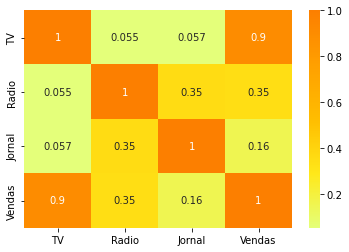

In [5]:
# correlação 
correlacao = df.corr()
display(correlacao)

# criando gráfigo
sns.heatmap(correlacao, cmap='Wistia', annot=True);

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [6]:
from sklearn.model_selection import train_test_split

In [25]:
# modelagem + algaritmos (aqui entra se necessário a inteligência artificial)

# y -> é quem eu quero prever 
y = df['Vendas']

# x -> quem eu vou usar para prever o y, ou seja, nesse caso o resto da tabela
x = df[['TV', 'Radio', 'Jornal']]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [8]:
# importar
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [9]:
# interpretanto os resultados
from sklearn.metrics import r2_score

# fazer as previsões 
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# comparar previsão com o y_teste
a = r2_score(y_teste, previsao_arvoredecisao)
b = r2_score(y_teste, previsao_regressaolinear) 

print(f'Resultado do modelo de arvore de decisão tem {a:.2%} de eficiência.')
print(f'Resultado do modelo de regressão linear tem {b:.2%} de eficiência.')


Resultado do modelo de arvore de decisão tem 96.54% de eficiência.
Resultado do modelo de regressão linear tem 90.71% de eficiência.


#### Visualização Gráfica das Previsões

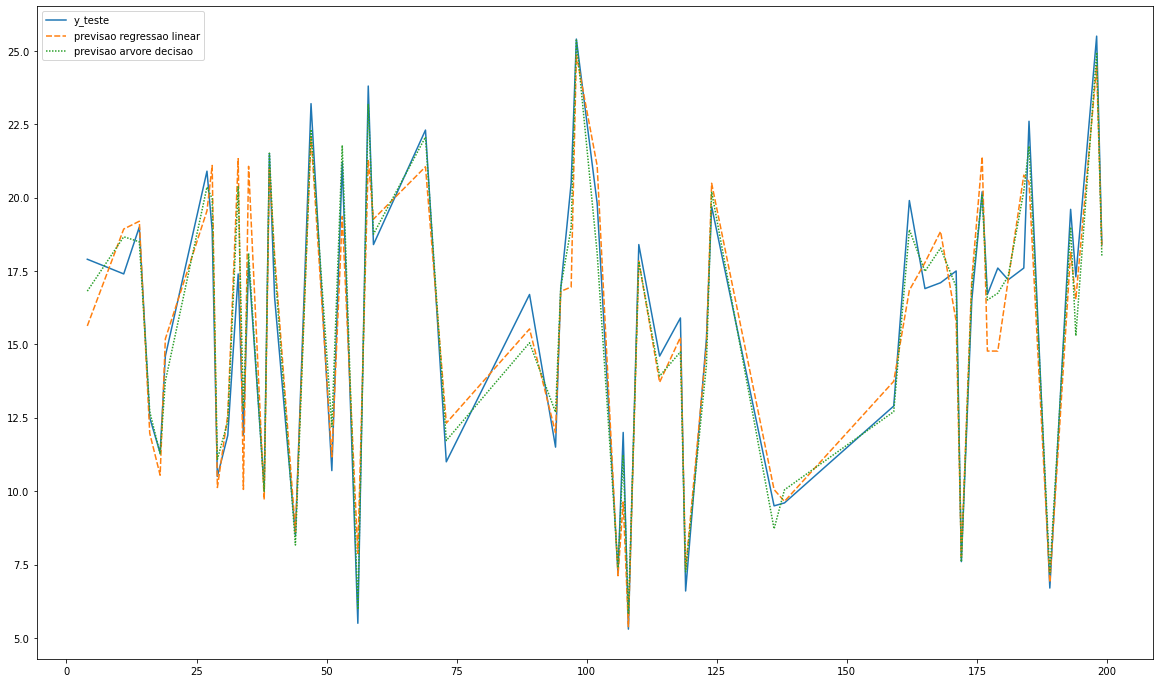

In [10]:
tab_aux = pd.DataFrame()
tab_aux['y_teste'] = y_teste
tab_aux['previsao regressao linear'] = previsao_regressaolinear
tab_aux['previsao arvore decisao'] = previsao_arvoredecisao

plt.figure(figsize=(20,12))
sns.lineplot(data=tab_aux)
plt.show()

In [26]:
# previsão das vendas da primera tabela usada no treinamento do modelo
previsao_vendas = modelo_arvoredecisao.predict(x)

In [27]:
x['previsão vendas'] = previsao_vendas

display(x)

,TV,Radio,Jornal,previsão vendas
0,230.1,37.8,69.2,21.950
1,44.5,39.3,45.1,10.585
2,17.2,45.9,69.3,10.591
3,151.5,41.3,58.5,16.626
4,180.8,10.8,58.4,16.814
...,...,...,...,...
195,38.2,3.7,13.8,7.909
196,94.2,4.9,8.1,13.580
197,177.0,9.3,6.4,15.746
198,283.6,42.0,66.2,24.951


#### Como fazer uma nova previsão?

In [20]:
df_new = pd.read_csv('novos.csv')
df_new

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [16]:
nova_previsao = modelo_arvoredecisao.predict(df_new)

In [17]:
print(nova_previsao)

[ 7.649  8.565 19.924]


In [22]:
df_new['previsao de venda'] = nova_previsao

In [23]:
df_new

,TV,Radio,Jornal,previsao de venda
0,23.1,3.8,69.2,7.649
1,44.5,0.0,5.1,8.565
2,170.2,45.9,0.0,19.924


- Percebemos que o melhor investimento a ser feito é na industria televisiva.